In [1]:
import pandas as pd
import numpy as np

#### 

#### 

#### 

#### 

In [12]:
from functools import cache

@cache
def fib(n):
    if n==0:
        return 0
    if n==1:
        return 1
    
    mem[n] = fib(n-1)+fib(n-2)
    
    return(mem[n])

mem = {}

memo = {}
for i in range(10):
    print(fib(i)) 

0
1
1
2
3
5
8
13
21
34


When should I consider using DP?

Problems that should be solved with DP usually have two main characteristics:

1.The problem will be asking for an optimal value (max or min) of something or the number of ways to do something.
    What is the minimum cost of doing ...
    What is the maximum profit of ...
    How many ways are there to ...
    What is the longest possible ...

2. At each step, you need to make a "decision", and decisions affect future decisions.
    A decision could be picking between two elements
    Decisions affecting future decisions could be something like "if you take an element x, then you can't take an element y in the future"

Note on the first characteristic: not all problems that are in these formats are meant to be solved with DP, and not all DP problems are in one of those formats. However, for a general guideline, these characteristics hold up very well.

#### Min Cost Climbing Stairs

You are given an integer array cost where cost[i] is the cost of the ith step on a staircase. Once you pay the cost, you can either climb one or two steps. You can either start from the step with index 0, or the step with index 1. Return the minimum cost to reach the top of the floor (outside the array, not the last index of cost).

In [2]:
# The framework

# To create any DP algorithm, there are 3 main components



# 1. A function or data structure that will compute/contain the answer to the problem for any given state

# Since we're starting with top-down, we will be talking about a function here. This involves two parts. 
# First, we need to decide what the function is returning. Second, we need to decide on what arguments the function should take 
# (state variables).
# The problem is asking for the minimum cost to climb the stairs. 
# So, let's define a function dp(state) that returns the minimum cost to climb the stairs for a given state.
# What state variables do we need? The only relevant state variable would be an index along the input, let's call it i.

In [3]:
# A good way to think about state variables is to imagine if the problem was a real-life scenario. 
# What information do you need to 100% describe a scenario? We certainly need to know what step 
# we're on - that's where i comes in. What about the color of your socks? 
# Standing on the 5th step with green socks is technically a different state than standing on the 5th step with red socks,
# but it doesn't change the cost of the steps, or anything relevant.

# Therefore, let's have a function dp(i) that returns the minimum cost to climb the stairs up to the ith step - i.e. 
# if the input was the subarray from index 0 up to and including i.

In [4]:
# 2. A recurrence relation to transition between states
# A recurrence relation is an equation used to calculate states. With Fibonacci, the recurrence relation was 
# Fn=Fn−1+Fn−2

# In this problem, let's say we wanted to figure out the minimum cost of climbing to the 100th step.
# The problem states that at each step, we are allowed to take one or two steps. That means, to get to the 100th step, 
# we must have arrived from the 99th or 98th step. Therefore, the minimum cost of climbing to the 100th step is 
# either the minimum cost of getting to the 99th step + the cost of the 99th step, or the minimum cost of getting 
# to the 98th step + the cost of the 98th step.

# dp(100) = min(dp(99) + cost[99], dp(98) + cost[98])

In [5]:
# Because of how we defined dp in the previous step, dp(99) gives us the minimum cost of getting to the 
# 99th step, and dp(98) gives us the minimum cost of getting to the 98th step.

# Or more generally:

# dp(i) = min(dp(i - 1) + cost[i - 1], dp(i - 2) + cost[i - 2])

# Which is the recurrence relation of this problem. 
# Typically, finding the recurrence relation is the hardest part of constructing a DP algorithm. 
# This one is relatively straightforward, but we'll see later that recurrence relations can be much more complicated.

In [ ]:
# 3. Base cases
# The recurrence relation is useless on its own. We still can't figure out dp(100) because we don't know dp(99) or dp(98). 
# If we try to find them, we have the same problem - how can we know dp(98) if we don't know dp(97) or dp(96)? 
# By itself, the recurrence relation will continue forever until dp(-infinity).

# We need base cases so that our function eventually returns actual values. 
# The problem states that we can start at steps 0 or 1. Therefore, the base cases are:

# dp(0) = dp(1) = 0

# With these base cases, we can find dp(2). With dp(2), we can find dp(3), 
# and so on until we have dp(98) and dp(99), then we can finally find dp(100).

In [2]:
#Top Down Approach
class Solution:
    def minCostClimbingStairs(self, cost) -> int:
        # 1. A function that returns the answer
        def dp(i):
            if i <= 1:
                # 3. Base cases
                return 0
            
            if i in memo:
                return memo[i]
            
            # 2. Recurrence relation
            memo[i] = min(dp(i - 1) + cost[i - 1], dp(i - 2) + cost[i - 2])
            return memo[i]
        
        memo = {}
        return dp(len(cost))
    


In [4]:
cost = [1,100,1,1,1,100,1,1,100,1]
Solution().minCostClimbingStairs(cost)

6

In [3]:
#Bottom Up approach using arrays
class Solution:
    def minCostClimbingStairs(self, cost) -> int:
        n = len(cost)
        # Step 2
        dp = [0] * (n + 1)
        
        # Step 3: Base cases are implicitly defined as they are 0

        # Step 4
        for i in range(2, n + 1):
            # Step 5
            dp[i] = min(dp[i - 1] + cost[i - 1], dp[i - 2] + cost[i - 2])
        
        # Step 6
        return dp[n]

#### House Robber

The second characteristic is usually what differentiates greedy and DP. The idea behind greedy is that local decisions do not affect other decisions. Let's say we had nums = [2,7,9,3,1], and we wanted to be greedy. Iterating along the array, the first decision is to take the 2 or the 7, since we can't have both. If we were greedy, we would take the 7. However, now we can no longer take the 9. In fact, the optimal answer involves taking 2, 9, 1. As you can see, being greedy in our decisions affected future decisions which lead us to the wrong answer.

In [5]:
# You are planning to rob houses along a street. The ith house has nums[i] money. 
# If you rob two houses beside each other, the alarm system will trigger and alert the police. 
# What is the most money you can rob without alerting the police?

In [6]:
cost = [2,7,9,3,1]


In [7]:
# think of dp function --> input is just the current step, 

# recurrence relation --> top-down: 

# condition 1: you have a chance to rob last house only if you haven't robbed house before 
# condition 2: if not at the last house : you will rob this house , if the next house house has smaller value 
# and you haven't robbed the house next to this one

# base case --> if at the 0th index house you will rob if you haven't robbed house next to it



In [5]:
# Watch Video

def rob(cost) -> int:
        # 1. A function that returns the answer
        def dp(i):
            # 3. Base cases 
            
            if i == 0:
                              
                return cost[i]           
            
            if i==1:
                return(max(cost[:i+1]))
            
            if i in memo:
                return memo[i]              
            
            # 2. Recurrence relation            
            memo[i] = max(dp(i - 1), dp(i - 2) + cost[i])
            
            return memo[i]
        
        memo = {}
        return dp(len(cost)-1)

In [6]:
cost = [2,7,9,3,1]
rob(cost)

12

In [3]:
from functools import cache

class Solution:
    def rob(self, nums) -> int:
        @cache
        def dp(i):
            # Base cases
            if i == 0:
                return nums[0]
            if i == 1:
                return max(nums[0], nums[1])

            # Recurrence relation
            return max(dp(i - 1), dp(i - 2) + nums[i])

        return dp(len(nums) - 1)

In [7]:
Solution().rob(cost)

12

In [ ]:
#Bottom Up Approach
class Solution:
    def rob(self, nums: List[int]) -> int:
        # To avoid out of bounds error from setting base case
        if len(nums) == 1:
            return nums[0]
        
        n = len(nums)
        dp = [0] * n
        
        # Base cases
        dp[0] = nums[0]
        dp[1] = max(nums[0], nums[1])
        
        for i in range(2, n):
            # Recurrence relation
            dp[i] = max(dp[i - 1], dp[i - 2] + nums[i])
        
        return dp[n - 1]

In [8]:
Solution().rob(cost)

12

Improving the space complexity

Actually, we can do better than O(n) space. When we are at state i, we only care about the previous two states. To get to state 100, we needed to go through 2 - 99, but once we're actually at 100, we don't care about 2 - 97. In the bottom-up implementation, we can replace the array with two variables that just keep track of the previous two states. arr[0] becomes obsolete once we get to arr[3] etc.

In [10]:
class Solution:
    def rob(self, nums) -> int:
        # To avoid out of bounds error from setting base case
        if len(nums) == 1:
            return nums[0]
        
        n = len(nums)

        # Base cases
        back_two = nums[0]
        back_one = max(nums[0], nums[1])
        
        for i in range(2, n):
            # back_two becomes back_one, and back_one gets updated
            back_one, back_two = max(back_one, back_two + nums[i]), back_one

        return back_one

In [11]:
Solution().rob(cost)

12

#### Longest Increasing Subsequence

In [ ]:
# Example 2: 300. Longest Increasing Subsequence
# Given an integer array nums, return the length of the longest strictly increasing subsequence.


In [1]:
# Example 1:

# Input: nums = [10,9,2,5,3,7,101,18]
# Output: 4
# Explanation: The longest increasing subsequence is [2,3,7,101], therefore the length is 4.

# Input: nums = [0,1,0,3,2,3]
# Output: 4

# Example 3:

# Input: nums = [7,7,7,7,7,7,7]
# Output: 1


How can we tell that this problem should be solved with DP? First, it asks for a maximum length. Second, whenever we decide to take an element as part of a subsequence, it changes the numbers that we can take in the future. If we have nums = [1, 2, 5, 3, 4] and iterate from left to right, how do we decide if we should take the 5 or not? If we take it, our length increases which is what we want, but then it stops us from taking the 3 and 4.

In [ ]:
# What will function return--> length of subsequence behind it, input variables--> ith value ?
# What is recurrence relation -->  
# What is the base case --> for i = 0, return 1, for i = 1, return 2, if arr[1]>arr[0]

In [26]:
def dp(i):
#     base cases
    if i==0: return 1
    if i==1:
        if nums[i] > nums[i-1]: return 2
        else : return 1
    
    mem[i] = dp(i-1) + (--(nums[i] > nums[i-1]))
    
    return(mem[i])

# nums = [10,9,2,5,3,7,101,18]
# nums = [7,7,7,7]
nums = [0,1,0,3,2,3]

mem = {}
ans = []
for i in range(len(nums)):
    ans.append(dp(i))


ans = sorted(ans, reverse= True)
ans[0]

4

In [14]:
# dict(sorted(mem.items(), key = lambda item: item[1], reverse = True))

{6: 4, 7: 4, 5: 3, 3: 2, 4: 2, 0: 1, 1: 1, 2: 1}

In [31]:
from functools import cache
class Solution:
    def lengthOfLIS(self, nums) -> int:
        @cache
        def dp(i):
            ans = 1 # Base case

            # Recurrence relation
            for j in range(i):
                if nums[i] > nums[j]:
                    ans = max(ans, dp(j) + 1)
            
            return ans

        return max(dp(i) for i in range(len(nums)))    

In [32]:
Solution().lengthOfLIS(nums)

4

#### Solving Questions With Brainpower

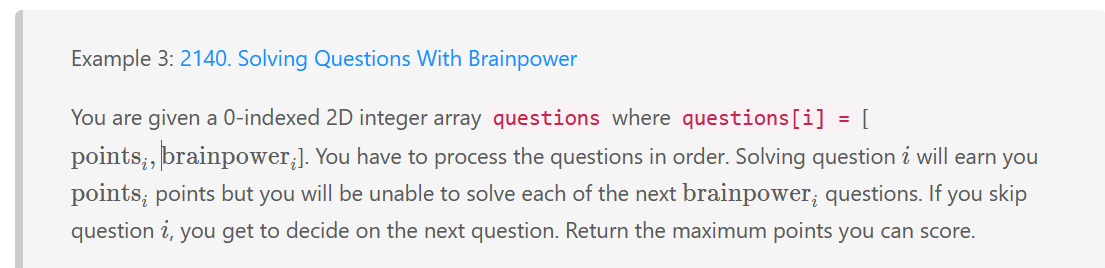

For example, given questions = [[3, 2], [4, 3], [4, 4], [2, 5]]:
        If question 0 is solved, you will earn 3 points but you will be unable to solve questions 1 and 2.
        If instead, question 0 is skipped and question 1 is solved, you will earn 4 points but you will be unable to solve questions 2 and 3.

Return the maximum points you can earn for the exam.

In [33]:
# Example 1:

# Input: questions = [[3,2],[4,3],[4,4],[2,5]]
# Output: 5
# Explanation: The maximum points can be earned by solving questions 0 and 3.
# - Solve question 0: Earn 3 points, will be unable to solve the next 2 questions
# - Unable to solve questions 1 and 2
# - Solve question 3: Earn 2 points
# Total points earned: 3 + 2 = 5. There is no other way to earn 5 or more points.


In [34]:
# Example 2:

# Input: questions = [[1,1],[2,2],[3,3],[4,4],[5,5]]
# Output: 7
# Explanation: The maximum points can be earned by solving questions 1 and 4.
# - Skip question 0
# - Solve question 1: Earn 2 points, will be unable to solve the next 2 questions
# - Unable to solve questions 2 and 3
# - Solve question 4: Earn 5 points
# Total points earned: 2 + 5 = 7. There is no other way to earn 7 or more points.


In [ ]:
# What should the function return ? What should be the input variable?
# What should be the recurrence relation?
# What are the base cases? 


How can we tell this problem should be solved with DP? First, it is asking for a maximum score. Second, at every question we need to make a decision: take or skip, and these decisions affect future decisions. If we decide to take a question, it prevents us from taking some future questions.

As you may expect by now, we can define a function dp that returns the maximum score we can achieve. What information do we need at each state (other than an index variable i to indicate the current question we are on)? We could include an integer that represents how many more questions we need to skip until we can start solving questions again, but similar to with house robber, we can encode this information in our recurrence relation, so we'll just stick with dp(i) returning the maximum score.

#### Climbing Stairs

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

1 <= n <= 45

In [11]:
# Example 1:
# Input: n = 2
# Output: 2
# Explanation: There are two ways to climb to the top.
# 1. 1 step + 1 step
# 2. 2 steps

# Example 2:
# Input: n = 3
# Output: 3
# Explanation: There are three ways to climb to the top.
# 1. 1 step + 1 step + 1 step
# 2. 1 step + 2 steps
# 3. 2 steps + 1 step

In [ ]:
# No of distinct ways to climb to the top
# base case: 
# if n = 1, return 1
# if n = 2, return 2

# recurrence relation, to reach the nth step , either you will reach from n-2 step or n-1 step. 
# from n-2 to n you can reach in 2 ways
# from n-1 to nth step you will reach in 1 way

# recurrence relation = dp(n-2) + 2
    

In [35]:

def climbstairs(n):
    if n == 1: return 1
    if n == 2: return 2
    
    
    mem[n] = climbstairs(n-2)+2 
    return mem[n]

mem = {}
climbstairs(3)

3

In [ ]:
One can reach ith step in one of the two ways:

    Taking a single step from (i−1)th step.

    Taking a step of 2 from (i−2)th step.

So, the total number of ways to reach ith is equal to sum of ways of reaching (i−1)th step and ways of reaching (i−2)th step.

Let dp[i] denotes the number of ways to reach on ith step:

dp[i]=dp[i−1]+dp[i−2]

In [ ]:
if n = 2, you can take 2 steps or 1+1 step. so 2 ways
if n=3, if you are at step 1, you can either take 2 steps to reach 3, or 1+1 step to reach 3 , so the combination is 
1+1+1, 1+2, what about 2+1 ?
if n = 4, from step 2 you can take 2 steps or 1+1 step so these are 2 ways , plus to reach step 2 you can do it in 2 ways, 
also you can first reach 3 and take 1 step. but there is some overlap.
so total 5--> 1+1+1+1, 1+1+2, 2+1+1, 2+2, 1+2+1
th last step above is part of reaching the 3rd step and taking another 1 step.




In [38]:

def climbstairs(n):
    if n == 1: return 1
    if n == 2: return 2
    
    #both are exclusive outcomes so even if overlap happens , its fine since number of ways
    #to achieve different outcomes is different, even if pattern of steps taken overlap
    
    mem[n] = climbstairs(n-2)+climbstairs(n-1)
    return mem[n]

mem = {}
climbstairs(5)

8

In [ ]:
import math
class Solution:
    
    def climbStairs(self, n: int) -> int:
        
#         count, count_2 = 0, int(n/2)
#         if(n<2):return(1)
        
#         else:
#             for i in range(1,count_2+1,1):
#                  count_1 = n-(i)*2
#                  count = count+math.factorial(count_1 + i)/(math.factorial(i)*math.factorial(count_1))
#             return(int(count+1))

        
        def dp(n):
            if n == 1: return 1
            if n == 2: return 2

            if n in mem:
                    return mem[n]
            #both are exclusive outcomes so even if overlap happens , its fine since number of ways
            #to achieve different outcomes is different, even if pattern of steps taken overlap
            
            mem[n] = dp(n-2) + dp(n-1) 
            
            return mem[n]
        
        mem = {}
        return(dp(n))

#### Coin Change

You are given an integer array coins representing coins of different denominations and an integer amount representing a total amount of money.

Return the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

You may assume that you have an infinite number of each kind of coin.

In [39]:
# Input: coins = [1,2,5], amount = 11
# Output: 3
# Explanation: 11 = 5 + 5 + 1

# Input: coins = [2], amount = 3
# Output: -1

# Input: coins = [1], amount = 0
# Output: 0



In [ ]:
# What will dp function return ? ---> coin count incremented value
# and what will be its input state ?---> current amount 
# A recurrence relation to transition between states ? 
# current_count + dp[current_amount-max(coin value less than current amount)]
# base cases ? amount<= 0, return 0

#Trying if we keep reducing the amount by max coin value <=amount
# the above method worked for few sample inputs but failed for 
# coins = sorted([186,419,83,408]), amount = 6249


In [92]:
count=0
coins = sorted([1, 2, 5])
curr_amt = 11

# coins = sorted([1])
# curr_amt = 0

# coins = sorted([2])
# curr_amt = 3

coins = sorted([186,419,83,408])
curr_amt = 6249

class Solution:
    def coinChange(self, coins, amount) -> int:
        count = 0
        mem = []
        coins = sorted(coins)

        def dp(curr_amt, count):
            if curr_amt == 0 : 
                return 0    
            if curr_amt <0 : 
                mem.append(-1) 
                return -1
            print(count, curr_amt, coins[bisect.bisect_right(coins,curr_amt)-1])
            count += 1
            curr_amt = curr_amt - coins[bisect.bisect_right(coins,curr_amt)-1]
            mem.append(count)
            
            dp(curr_amt, count)
            
            return
        dp(amount, count)
        if len(mem)==0:
            return 0
        else: return(mem[-1])
        
Solution().coinChange(coins, curr_amt)

0 6249 419
1 5830 419
2 5411 419
3 4992 419
4 4573 419
5 4154 419
6 3735 419
7 3316 419
8 2897 419
9 2478 419
10 2059 419
11 1640 419
12 1221 419
13 802 419
14 383 186
15 197 186
16 11 419


-1

In [59]:
# dp(11,0)---11-5=6 & count=1,6-5=1 & count=2, 1-1=0,  

In [60]:
dp(6, 1)  

(2, 1)

In [61]:
dp(1,2) 

(3, 0)

In [62]:
dp(0,3) 

In [69]:
[2,5][bisect.bisect_right([2,5],1)]

2

In [68]:
bisect.bisect_right([2,5],1)

0

#### Hard: Candy

There are n children standing in a line. Each child is assigned a rating value given in the integer array ratings.

You are giving candies to these children subjected to the following requirements:

    Each child must have at least one candy.
    Children with a higher rating get more candies than their neighbors.

Return the minimum number of candies you need to have to distribute the candies to the children.

In [3]:
# Example 1:

# Input: ratings = [1,0,2]
# Output: 5
# Explanation: You can allocate to the first, second and third child with 2, 1, 2 candies respectively.

# Example 2:

# Input: ratings = [1,2,2]
# Output: 4
# Explanation: You can allocate to the first, second and third child with 1, 2, 1 candies respectively.
# The third child gets 1 candy because it satisfies the above two conditions.



In [ ]:
# What should function return --> candy for the ith child, What should be input : index
# What is the recurrence relation --> 
# What is the base case --> if ratings[0]> ratings[1]: 2, else 1


In [23]:
ratings = [1,2,2]
# ratings = [1,0,2]
# ratings = [1,3,2,2,1]
ratings = [29,51,87,87,72,12]

mem = {}

def dp(i):
    #base case
    if i == 0:
        if ratings[i] > ratings[i+1]: return 2
        else: return 1
    
    
    prev = dp(i-1) 
    
    
    if ratings[i] > ratings[i-1]: 
        mem[i] = prev + 1
    
    elif ratings[i] == ratings[i-1]:
        if prev > 1:
            mem[i] = prev -1
        else : mem[i] = 1
    
    else:
        if prev > 1:
            mem[i] = prev - 1
        else:            
                    
            mem[i-1] += 1
            mem[i] = 1
            
    
    return mem[i]

total_candies = 0 
for i in range(len(ratings)):
    mem[i] = dp(i)
for i, j in mem.items():
    total_candies += j
mem   , total_candies 

({0: 1, 1: 2, 2: 3, 3: 2, 4: 2, 5: 1}, 11)

In [26]:
[29,51,87,87,72,12] = [1, 2, 3, 2, 2, 1]

In [27]:
total_candies = 0 
for i, j in mem.items():
    total_candies += j
    print (j, total_candies)

1 1
2 3
3 6
2 8
2 10
1 11


In [34]:
def dp(i):
    #base case
    if i == 0:
        if ratings[i] > ratings[i+1]: return 2
        else: return 1
    
    prev = dp(i-1)
    if ratings[i] > ratings[i-1]: 
        mem[i] = prev + 1
    
    elif ratings[i] == ratings[i-1]:
        if prev > 1:
            mem[i] = prev -1
        else : mem[i] = 1
    
    else:
        if prev > 1:
            mem[i] = prev - 1
        else:            
            mem[i-1] += 1
            mem[i] = 1
            
            for j in range(i-2, -1, -1):
                if (ratings[j] > ratings[j+1]) & (mem[j]<=mem[j+1]):
                    mem[j] = mem[j+1]+1  
                if (ratings[j] <= ratings[j+1]) & (mem[j]<=mem[j+1]):
                    break
                
    return(mem[i])



total_candies = 0
for i in range(len(ratings)):
    mem[i] = dp(i)
for i, j in mem.items():
    total_candies += j    
mem, total_candies    

({0: 1, 1: 2, 2: 3, 3: 3, 4: 2, 5: 1}, 12)

In [ ]:
[29,51,52,87,87,72,12, 11] = [1, 2, 3, 4, 3, 2, 1, 0] = [1, 2, 3, 4, 3, 3, 2, 1] 


[1,2,87,87,87,2,1] = [1, 2, 3, 2, 1, 1,1, 1] = [1, 2, 3, 2, 1, 1, 1, 1]